<center><H2>Bacterial Classification</H2></center>

In [1]:
import numpy as np
import pandas as pd

<h3>Importing the datasets</h3>

In [2]:
#reading the dataset from train.csv
data=pd.read_csv("/Users/shubham/Downloads/tabular-playground-series-feb-2022/train.csv",index_col="row_id")

In [3]:
#***
# #reading the test dataset from test.csv
# test_data=pd.read_csv("/Users/shubham/Downloads/tabular-playground-series-feb-2022/test.csv",index_col="row_id")

<h3>Explore dataset</h3>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Columns: 287 entries, A0T0G0C10 to target
dtypes: float64(286), object(1)
memory usage: 439.5+ MB


In [5]:
data.describe

<bound method NDFrame.describe of            A0T0G0C10      A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  \
row_id                                                                       
0      -9.536743e-07 -9.536743e-06 -0.000043 -0.000114 -0.000200 -0.000240   
1      -9.536743e-07 -9.536743e-06 -0.000043  0.000886 -0.000200  0.000760   
2      -9.536743e-07 -1.536743e-06  0.000007  0.000129  0.000268  0.000270   
3       4.632568e-08 -5.536743e-06  0.000012  0.000245  0.000492  0.000522   
4      -9.536743e-07 -9.536743e-06 -0.000043 -0.000114 -0.000200 -0.000240   
...              ...           ...       ...       ...       ...       ...   
199995 -9.536743e-07  4.632568e-07 -0.000003  0.000176  0.000350  0.000290   
199996 -9.536743e-07 -9.536743e-06 -0.000043 -0.000114 -0.000200 -0.000240   
199997  4.632568e-08  1.463257e-06 -0.000005 -0.000031 -0.000019 -0.000037   
199998 -9.536743e-07 -9.536743e-06 -0.000043 -0.000114 -0.000200 -0.000240   
199999  1.046326e-06 -1.536743

<H2>Exploratory Data analysis</H2>

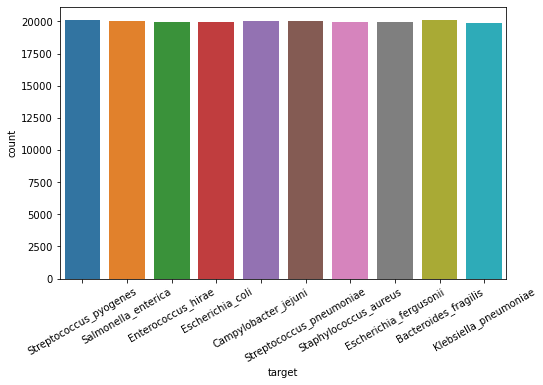

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
ax=sns.countplot(x='target', data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.figure.savefig('class balance.png')

In [7]:
# creating the dictionary of column names
bacteria_feature_means = {}

In [8]:
# storing the bacteria names in list
bacteria_names= np.unique(data['target']).tolist()

In [9]:
gk = data.groupby('target')

In [10]:
# Calculating the mean of every feature for every virus
for name in bacteria_names:
    temp=gk.get_group(name)
    bacteria_feature_means[name]=temp.mean()

/var/folders/m4/54647rqs1jjdntpxdbb4z4z80000gn/T/ipykernel_22265/899432424.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bacteria_feature_means[name]=temp.mean()


In [86]:
kmers=bacteria_feature_means.get('Bacteroides_fragilis') #mean of every feature for 'Klebsiella_pneumoniae' bacteria
kmers_count = data.columns.drop('target')

In [87]:
print(kmers)

A0T0G0C10   -1.343019e-09
A0T0G1C9    -4.590122e-06
A0T0G2C8    -2.128100e-05
A0T0G3C7    -8.035139e-05
A0T0G4C6    -1.339023e-04
                 ...     
A8T2G0C0     2.827772e-04
A9T0G0C1     4.583289e-05
A9T0G1C0     7.796671e-05
A9T1G0C0     9.174172e-05
A10T0G0C0   -4.038456e-07
Length: 286, dtype: float64


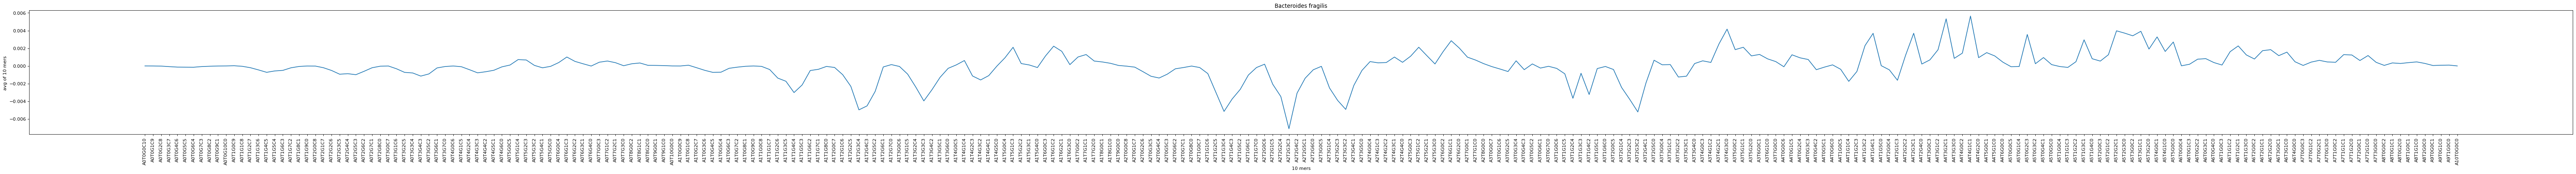

In [89]:
# mean is plotted against each histogram from (A0T0G0C10 to A10T0G0C0) on a line graph for 'Klebsiella_pneumoniae' bacteria
from matplotlib.pyplot import figure
figure(figsize=(100, 5), dpi=80)
plt.xticks(rotation=90)
plt.plot(kmers_count,kmers)
plt.title('Bacteroides fragilis')
plt.xlabel('10 mers')
plt.ylabel('avg of 10 mers ')
plt.savefig('Bacteroides_fragilis.png')
plt.show()

In [13]:
data

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-6.536743e-06,...,0.000084,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-6.536743e-06,...,0.000151,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-9.536743e-06,...,0.000124,0.000057,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,Salmonella_enterica
199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,-7.536743e-06,...,0.000115,0.000131,0.000110,0.000213,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,Streptococcus_pneumoniae


In [14]:
from math import factorial

In [15]:
elements = data.columns.tolist() # storing the all features in 'elements' variable
elements=elements[:-1] # removing the 'target' feature

In [16]:
# Converting the flot values to the integers by adding the bias as per given by the formula in referred paper
def bias(w, x, y, z):
    return factorial(10) / (factorial(w) * factorial(x) * factorial(y) * factorial(z) * 4**10)

def bias_of(s):
    w = int(s[1:s.index('T')])
    x = int(s[s.index('T')+1:s.index('G')])
    y = int(s[s.index('G')+1:s.index('C')])
    z = int(s[s.index('C')+1:])
    return factorial(10) / (factorial(w) * factorial(x) * factorial(y) * factorial(z) * 4**10)

train_i = pd.DataFrame({col: ((data[col] + bias_of(col)) * 1000000).round().astype(int)
                        for col in elements})
train_i

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
row_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1000,0,1000,0,0,0,0,...,0,0,0,1000,1000,0,0,0,0,0
2,0,8,50,243,468,510,443,239,44,3,...,85,170,91,167,192,115,20,18,29,2
3,1,4,55,359,692,762,596,311,40,3,...,111,237,143,266,288,196,31,25,56,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,10,40,290,550,530,400,320,20,0,...,60,210,100,190,230,70,10,70,30,0
199996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1000,1000,0,0,0,0,0
199997,1,11,38,83,181,203,163,99,38,2,...,71,201,174,196,299,137,26,45,31,1


<H4>Encoding of Target column</H4>

In [17]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical values from target column which ordinal.
np.random.seed(1234)
encoder = LabelEncoder()
encoder.fit(data['target'])
data['target'] = encoder.transform(data['target'])

In [18]:
from sklearn import preprocessing
# print the encoded number corresponding to their bacterial names.
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)

{'Bacteroides_fragilis': 0, 'Campylobacter_jejuni': 1, 'Enterococcus_hirae': 2, 'Escherichia_coli': 3, 'Escherichia_fergusonii': 4, 'Klebsiella_pneumoniae': 5, 'Salmonella_enterica': 6, 'Staphylococcus_aureus': 7, 'Streptococcus_pneumoniae': 8, 'Streptococcus_pyogenes': 9}


In [19]:
# calculating the greatest common divisor for each row
data['gcd'] = np.gcd.reduce(train_i[elements], axis=1)

In [20]:
# greatest common divisor corresponding to number of rows
np.unique(data['gcd'], return_counts=True)

(array([    1,    10,  1000, 10000]), array([49969, 50002, 50058, 49971]))

In [21]:
train_i.sum(axis=1).min(), train_i.sum(axis=1).max()

(1000000, 1000000)

<H4>PCA for dimentionality reduction</H4>

***


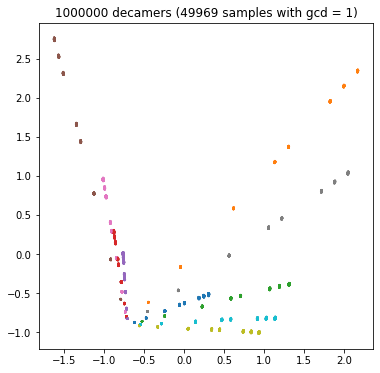

***


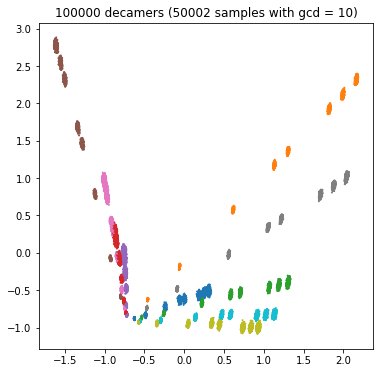

***


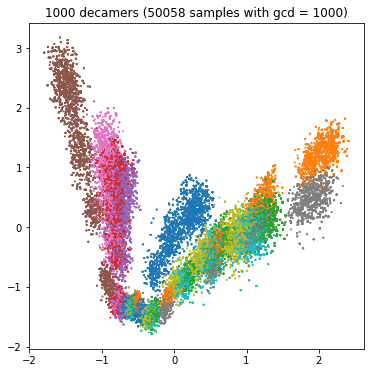

***


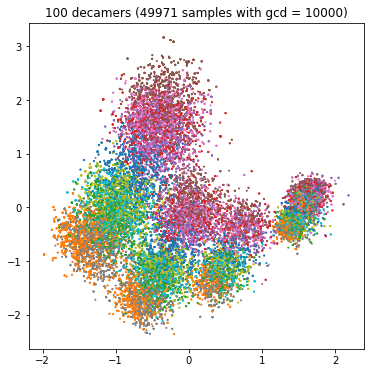

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
for scale in np.sort(data['gcd'].unique()):
    # Compute the PCA
    pca = PCA(whiten=True, random_state=1)
    pca.fit(train_i[elements][data['gcd'] == scale])

    # Transform the data so that the components can be analyzed
    Xt_tr = pca.transform(train_i[elements][data['gcd'] == scale])
    #Xt_te = pca.transform(test_i[elements][test_data['gcd'] == scale])

    # Plot a scattergram, projected to two PCA components, colored by classification target
    plt.figure(figsize=(6,6))
    plt.scatter(Xt_tr[:,0], Xt_tr[:,1], c=data.target[data['gcd'] == scale], cmap='tab10', s=1)
    plt.title(f"{1000000 // scale} decamers ({(data['gcd'] == scale).sum()} samples with gcd = {scale})")
    if scale == 10000:
        plt.savefig("100_decamers.png")
    print("***")
    plt.show()

In [23]:
data

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,gcd
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,9,10000
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,6,1000
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-6.536743e-06,...,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,6,1
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-6.536743e-06,...,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,6,1
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,2,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-9.536743e-06,...,0.000057,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,6,10
199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,9,1000
199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,-7.536743e-06,...,0.000131,0.000110,0.000213,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,8,1


In [24]:
data =  data.iloc[: , :-1]

In [25]:
data

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,9
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,6
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-6.536743e-06,...,0.000084,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,6
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-6.536743e-06,...,0.000151,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,6
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-9.536743e-06,...,0.000124,0.000057,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,6
199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,9
199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,-7.536743e-06,...,0.000115,0.000131,0.000110,0.000213,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,8


<H3>Remove the Duplicates </H3>

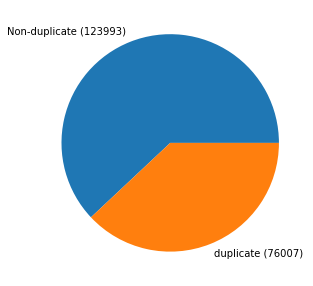

In [26]:
temp=(data.drop_duplicates())
y = np.array([len(temp), len(data)-len(temp)])
mylabels = ["Non-duplicate (%i)"%len(temp), "duplicate (%i)"%(len(data)-len(temp))]
plt.figure(figsize=(5,5))
plt.pie(y, labels = mylabels)
plt.savefig("duplicate_records.png")
plt.show() 

In [27]:
data = data.drop_duplicates()

<H5>After removing the duplicates from training set</H5>

In [28]:
# drop the 'gcd' column from the train dataset
#train_data =  train_data.iloc[: , :-1]

<H3>Splitting data into Training and testing set</H3>

In [29]:
from sklearn.model_selection import train_test_split
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data.iloc[ :, -1], random_state=0, train_size = .75)

<h1>Evaluating the Performance for the model</h1>

<H3>Hyper parameter tuning</H3>

In [30]:
# taking the 5000 records from the data set inorder to avoid time delay while tuning the hyperparameter
np.random.seed(1234)
X_hyper_tuning = data.sample(n=5000)

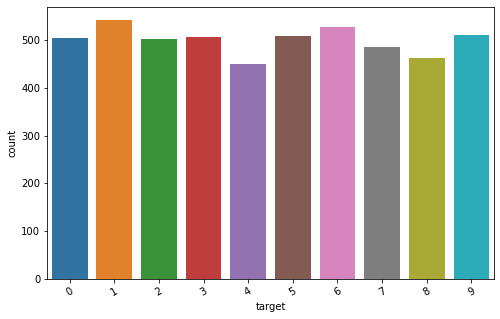

In [31]:
# Visualizing the distribution of bacterial species from sample size of 5000
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
ax=sns.countplot(x='target', data=X_hyper_tuning)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.figure.savefig('class balance.png')

In [32]:
X = X_hyper_tuning.iloc[:,:-1]
y = X_hyper_tuning.iloc[ :, -1]

In [33]:
# for train_index, test_index in skf.split(X, y):
#     x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
#     y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
#     #neigh.fit(x_train_fold, y_train_fold)
#     gnb.fit(x_train_fold, y_train_fold)
#     #lst_accu_stratified.append(gnb.score(x_test_fold, y_test_fold))

<H3>Hyper parameter tuning for Logistic regression<H3>

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
# defining parameter range
np.random.seed(1234)
logreg = LogisticRegression()
param_grid = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}

grid = GridSearchCV(logreg, param_grid,cv= StratifiedKFold(10).split(X, y), refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X, y)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV 1/10] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/10] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/10] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/10] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/10] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/10] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/10] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/10] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/10] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 10/10] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/10] END ..C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END ..C=0.001, 

[CV 10/10] END C=0.01, penalty=l2, solver=newton-cg;, score=0.108 total time=   0.1s
[CV 1/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.108 total time=   0.0s
[CV 2/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.108 total time=   0.0s
[CV 3/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.108 total time=   0.0s
[CV 4/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.110 total time=   0.0s
[CV 5/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.110 total time=   0.0s
[CV 6/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.108 total time=   0.0s
[CV 7/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.108 total time=   0.0s
[CV 8/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.108 total time=   0.0s
[CV 9/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.108 total time=   0.0s
[CV 10/10] END C=0.01, penalty=l2, solver=lbfgs;, score=0.108 total time=   0.0s
[CV 1/10] END C=0.01, penalty=l2, solver=liblinear;, score=0.108 total time=   0.3s
[CV 2/10] END C=0.01,

[CV 1/10] END C=1.0, penalty=l1, solver=liblinear;, score=0.322 total time=   0.3s
[CV 2/10] END C=1.0, penalty=l1, solver=liblinear;, score=0.336 total time=   0.4s
[CV 3/10] END C=1.0, penalty=l1, solver=liblinear;, score=0.332 total time=   0.3s
[CV 4/10] END C=1.0, penalty=l1, solver=liblinear;, score=0.344 total time=   0.4s
[CV 5/10] END C=1.0, penalty=l1, solver=liblinear;, score=0.356 total time=   0.4s
[CV 6/10] END C=1.0, penalty=l1, solver=liblinear;, score=0.352 total time=   0.3s
[CV 7/10] END C=1.0, penalty=l1, solver=liblinear;, score=0.354 total time=   0.3s
[CV 8/10] END C=1.0, penalty=l1, solver=liblinear;, score=0.364 total time=   0.4s
[CV 9/10] END C=1.0, penalty=l1, solver=liblinear;, score=0.310 total time=   0.4s
[CV 10/10] END C=1.0, penalty=l1, solver=liblinear;, score=0.338 total time=   0.4s
[CV 1/10] END C=1.0, penalty=l2, solver=newton-cg;, score=0.230 total time=   0.1s
[CV 2/10] END C=1.0, penalty=l2, solver=newton-cg;, score=0.230 total time=   0.1s
[CV

/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/10] END .C=10.0, penalty=l2, solver=lbfgs;, score=0.520 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/10] END .C=10.0, penalty=l2, solver=lbfgs;, score=0.486 total time=   0.4s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/10] END .C=10.0, penalty=l2, solver=lbfgs;, score=0.504 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/10] END .C=10.0, penalty=l2, solver=lbfgs;, score=0.488 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/10] END .C=10.0, penalty=l2, solver=lbfgs;, score=0.498 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/10] END .C=10.0, penalty=l2, solver=lbfgs;, score=0.470 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/10] END .C=10.0, penalty=l2, solver=lbfgs;, score=0.496 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 8/10] END .C=10.0, penalty=l2, solver=lbfgs;, score=0.520 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 9/10] END .C=10.0, penalty=l2, solver=lbfgs;, score=0.472 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 10/10] END C=10.0, penalty=l2, solver=lbfgs;, score=0.488 total time=   0.3s
[CV 1/10] END C=10.0, penalty=l2, solver=liblinear;, score=0.490 total time=   0.8s
[CV 2/10] END C=10.0, penalty=l2, solver=liblinear;, score=0.434 total time=   0.8s
[CV 3/10] END C=10.0, penalty=l2, solver=liblinear;, score=0.466 total time=   0.8s
[CV 4/10] END C=10.0, penalty=l2, solver=liblinear;, score=0.444 total time=   0.8s
[CV 5/10] END C=10.0, penalty=l2, solver=liblinear;, score=0.476 total time=   0.8s
[CV 6/10] END C=10.0, penalty=l2, solver=liblinear;, score=0.446 total time=   0.8s
[CV 7/10] END C=10.0, penalty=l2, solver=liblinear;, score=0.470 total time=   0.8s
[CV 8/10] END C=10.0, penalty=l2, solver=liblinear;, score=0.480 total time=   0.8s
[CV 9/10] END C=10.0, penalty=l2, solver=liblinear;, score=0.440 total time=   0.9s
[CV 10/10] END C=10.0, penalty=l2, solver=liblinear;, score=0.470 total time=   0.9s
[CV 1/10] END C=100.0, penalty=l1, solver=newton-cg;, score=nan total time=   

/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/10] END C=100.0, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/10] END C=100.0, penalty=l2, solver=lbfgs;, score=0.690 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/10] END C=100.0, penalty=l2, solver=lbfgs;, score=0.682 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/10] END C=100.0, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/10] END C=100.0, penalty=l2, solver=lbfgs;, score=0.684 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/10] END C=100.0, penalty=l2, solver=lbfgs;, score=0.682 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/10] END C=100.0, penalty=l2, solver=lbfgs;, score=0.668 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 8/10] END C=100.0, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 9/10] END C=100.0, penalty=l2, solver=lbfgs;, score=0.668 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 10/10] END C=100.0, penalty=l2, solver=lbfgs;, score=0.678 total time=   0.3s
[CV 1/10] END C=100.0, penalty=l2, solver=liblinear;, score=0.672 total time=   1.3s
[CV 2/10] END C=100.0, penalty=l2, solver=liblinear;, score=0.668 total time=   1.2s
[CV 3/10] END C=100.0, penalty=l2, solver=liblinear;, score=0.648 total time=   1.3s
[CV 4/10] END C=100.0, penalty=l2, solver=liblinear;, score=0.652 total time=   1.2s
[CV 5/10] END C=100.0, penalty=l2, solver=liblinear;, score=0.648 total time=   1.2s
[CV 6/10] END C=100.0, penalty=l2, solver=liblinear;, score=0.648 total time=   1.3s
[CV 7/10] END C=100.0, penalty=l2, solver=liblinear;, score=0.638 total time=   1.2s
[CV 8/10] END C=100.0, penalty=l2, solver=liblinear;, score=0.710 total time=   1.2s
[CV 9/10] END C=100.0, penalty=l2, solver=liblinear;, score=0.640 total time=   1.3s
[CV 10/10] END C=100.0, penalty=l2, solver=liblinear;, score=0.652 total time=   1.2s
[CV 1/10] END C=1000.0, penalty=l1, solver=newton-cg;, score=nan to

/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/10] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/10] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.698 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/10] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.730 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/10] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.708 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/10] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.676 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/10] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/10] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.674 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 8/10] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.776 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 9/10] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.634 total time=   0.3s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 10/10] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.692 total time=   0.3s
[CV 1/10] END C=1000.0, penalty=l2, solver=liblinear;, score=0.824 total time=   1.8s
[CV 2/10] END C=1000.0, penalty=l2, solver=liblinear;, score=0.840 total time=   1.8s
[CV 3/10] END C=1000.0, penalty=l2, solver=liblinear;, score=0.810 total time=   1.8s
[CV 4/10] END C=1000.0, penalty=l2, solver=liblinear;, score=0.838 total time=   1.9s
[CV 5/10] END C=1000.0, penalty=l2, solver=liblinear;, score=0.826 total time=   1.8s
[CV 6/10] END C=1000.0, penalty=l2, solver=liblinear;, score=0.816 total time=   1.8s
[CV 7/10] END C=1000.0, penalty=l2, solver=liblinear;, score=0.816 total time=   1.8s
[CV 8/10] END C=1000.0, penalty=l2, solver=liblinear;, score=0.856 total time=   1.8s
[CV 9/10] END C=1000.0, penalty=l2, solver=liblinear;, score=0.792 total time=   1.8s
[CV 10/10] END C=1000.0, penalty=l2, solver=liblinear;, score=0.828 total time=   1.8s


/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/shubham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f79808f0740>,
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=3)

<h3>Best parameters for logistic regression after hyperparameter tuning</h3>

In [35]:
print("Tuned Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

Tuned Hyperparameters : {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8789999999999999


In [69]:
lgr=LogisticRegression(C=1000, penalty='l1',solver='liblinear')

<H3>Fitting the logistic regression model to training dataset</H3>

In [70]:
lgr.fit(X_train,y_train)

LogisticRegression(C=1000, penalty='l1', solver='liblinear')

In [38]:
predicted_lr = lgr.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_lr))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3120
           1       0.93      0.95      0.94      3101
           2       0.89      0.84      0.86      3110
           3       0.83      0.83      0.83      3035
           4       0.85      0.87      0.86      3046
           5       0.96      0.97      0.97      3093
           6       0.90      0.83      0.86      3103
           7       0.93      0.95      0.94      3170
           8       0.91      0.91      0.91      3146
           9       0.86      0.90      0.88      3075

    accuracy                           0.90     30999
   macro avg       0.90      0.90      0.90     30999
weighted avg       0.90      0.90      0.90     30999



In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicted_lr))

0.8964160134197877


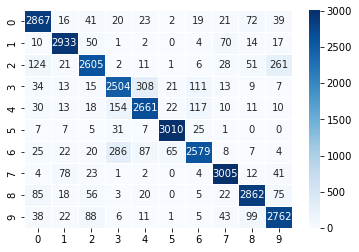

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
# label 0 = negative, 1 = neutral, 2 = positive
cf_matrix = confusion_matrix(y_test, predicted_lr)
af=sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', cmap ='Blues')
af.figure.savefig('conf_matrix_lr.png', dpi=400)

In [76]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, predicted_lr,average='micro')
recall = recall_score(y_test, predicted_lr,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)


Precision:  0.8964160134197877
Recall:  0.8964160134197877


In [42]:
# # importing the pandas library
# import pandas as pd
# target = encoder.inverse_transform(predicted_lr)
# # reading the csv file
# df = pd.read_csv("/Users/shubham/Downloads/tabular-playground-series-feb-2022/sample_submission.csv")

# # updating the column value/data
# df['target'] = target

# # writing into the file
# df.to_csv("/Users/shubham/Desktop/Data Science Project/AllDetails.csv", index=False)

# print(df)

In [43]:
len(X)

5000

<H3>Hyper parameter tuning for Random forest<H3>

In [44]:
# Define Parameters
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1234)
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = StratifiedKFold(10).split(X, y))
grid_results = grid.fit(X, y)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))

Best: [0.6572 0.6774 0.677  0.864  0.8706 0.8788 0.8752 0.8784 0.8846], using {'max_depth': 16, 'n_estimators': 256}


In [79]:
rf=RandomForestClassifier(n_estimators=256, max_depth=16)
rf.fit(X_train,y_train)
predicted_rf = rf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicted_rf))
precision = precision_score(y_test, predicted_rf,average='micro')
recall = recall_score(y_test, predicted_rf,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)


0.9679021903932384
Precision:  0.9679021903932384
Recall:  0.9679021903932384


In [47]:
# imp_df = pd.DataFrame({
#     "Varname": X_train.columns,
# #     "Imp": rf.feature_importances_
# })

In [48]:
# imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
206,A4T0G4C2,0.013669
214,A4T1G5C0,0.013437
190,A3T3G3C1,0.013345
5,A0T0G5C5,0.013115
189,A3T3G2C2,0.011460
...,...,...
174,A3T1G0C6,0.000389
67,A1T0G1C8,0.000380
180,A3T1G6C0,0.000353
99,A1T3G6C0,0.000320


In [49]:
# rf.criterion

'gini'

Text(0.5, 474.0, 'Random Forest Feature Importance')

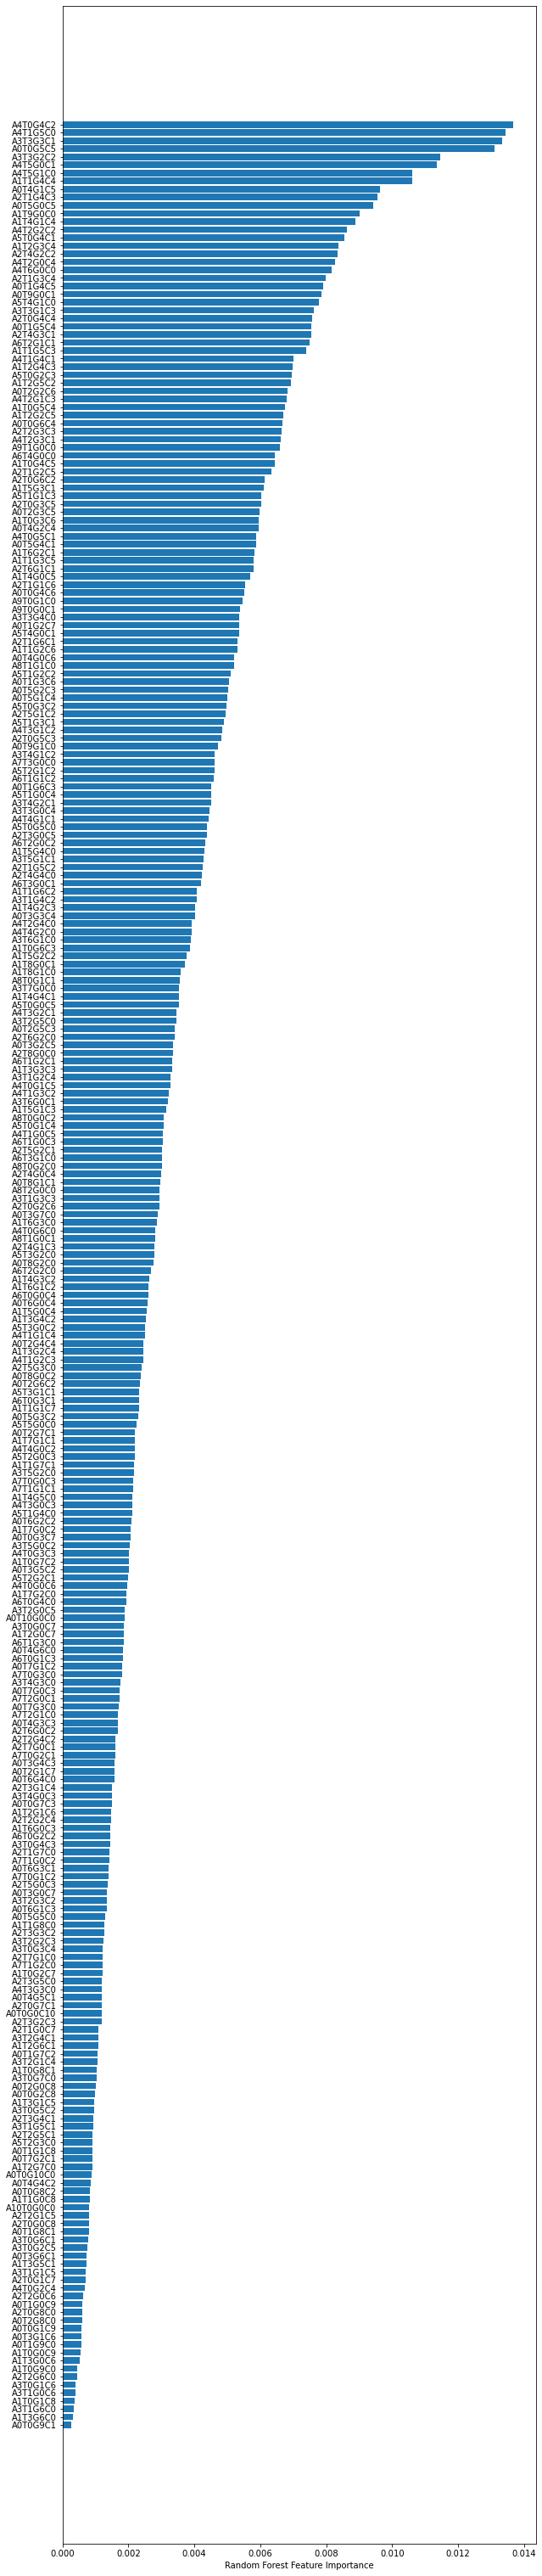

In [50]:
# sorted_idx = rf.feature_importances_.argsort()
# plt.figure(figsize=(10,55))
# plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
# plt.savefig("RandomForestFeatureImportance.png")
# plt.xlabel("Random Forest Feature Importance")


In [51]:
# estimator = rf.estimators_[5]

In [52]:
X_train

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
row_id,,,,,,,,,,,,,,,,,,,,,
18282,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-2.002716e-04,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-9.536743e-06,-9.536743e-07
59890,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-2.002716e-04,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-9.536743e-06,-9.536743e-07
782,-9.536743e-07,-0.000010,-4.291534e-05,0.009886,-0.000200,-0.000240,-2.002716e-04,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-9.536743e-06,-9.536743e-07
197840,4.632568e-08,0.000003,8.465576e-08,-0.000015,0.000007,-0.000004,-4.271606e-06,0.000003,0.000003,-0.000008,...,0.000007,0.000036,0.000036,0.000041,0.000073,0.000032,1.146326e-05,0.000014,9.463257e-06,4.632568e-08
36978,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-2.002716e-04,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-9.536743e-06,-9.536743e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56425,-9.536743e-07,0.000010,2.708466e-05,0.000026,0.000050,0.000140,1.972839e-05,0.000086,-0.000033,-0.000010,...,0.000017,0.000054,0.000087,0.000044,0.000034,0.000027,4.632568e-07,0.000020,4.632568e-07,-9.536743e-07
187069,-9.536743e-07,-0.000003,8.465576e-08,0.000014,0.000036,0.000008,2.872839e-05,0.000016,-0.000005,-0.000007,...,0.000045,0.000072,0.000044,0.000085,0.000119,0.000068,1.046326e-05,0.000005,2.246326e-05,4.632568e-08
51668,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-2.002716e-04,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-9.536743e-06,-9.536743e-07


In [53]:
# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(estimator, out_file='tree.dot',
#                 feature_names = X_train.columns,
#                 class_names = str(y_train),
#                 rounded = True, proportion = False,
#                 precision = 2, filled = True)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [54]:
# from sklearn import tree
# fn=X_train.columns
# cn=y_train
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# tree.plot_tree(rf.estimators_[0],
#                feature_names = fn,
#                class_names=str(cn),
#                filled = True);
# fig.savefig('rf_individualtree.png')

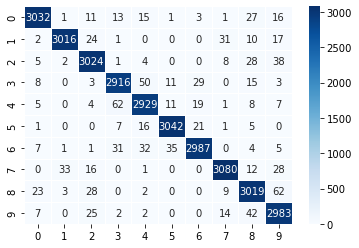

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
# label 0 = negative, 1 = neutral, 2 = positive
cf_matrix = confusion_matrix(y_test, predicted_rf)
af=sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', cmap ='Blues')
af.figure.savefig('conf_matrix_rf.png', dpi=400)

<H3>Naive Bayes<H3>

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
predicted_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [78]:
print(accuracy_score(y_test, predicted_gnb))
precision = precision_score(y_test, predicted_gnb,average='micro')
recall = recall_score(y_test, predicted_gnb,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)


0.5019516758605116
Precision:  0.5019516758605116
Recall:  0.5019516758605116


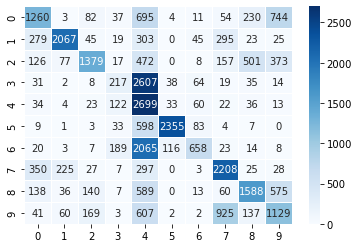

In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
# label 0 = negative, 1 = neutral, 2 = positive
cf_matrix = confusion_matrix(y_test, predicted_gnb)
af=sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', cmap ='Blues')
af.figure.savefig('conf_matrix_gnb.png', dpi=400)

In [59]:
# estimator_KNN = KNeighborsClassifier(algorithm='auto')
# parameters_KNN = {
#     'n_neighbors': (1,10, 1),
#     'leaf_size': (20,40,1),
#     'p': (1,2),
#     'weights': ('uniform', 'distance'),
#     'metric': ('minkowski', 'chebyshev'),
#
# # with GridSearch
# grid_search_KNN = GridSearchCV(estimator=estimator_KNN,param_grid=parameters_KNN,scoring = 'accuracy',n_jobs = -1, cv = StratifiedKFold(10).split(X, y))

In [60]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(1234)
knn = KNeighborsClassifier()
params = {
    'n_neighbors': [1,2,3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'p': [1,2],
    'metric': ['minkowski', 'chebyshev']
}

clf = GridSearchCV(
    estimator=knn,
    param_grid=params,
    cv = StratifiedKFold(10).split(X, y),
    n_jobs=5,
    verbose=1
)

In [61]:
clf.fit(X,y)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f79869efe40>,
             estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': [1, 2, 3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [62]:
clf.best_params_

{'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

In [63]:
knn = KNeighborsClassifier(metric='minkowski',p=1, weights='distance', n_neighbors = 9)
knn.fit(X_train,y_train)
predicted_knn = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicted_knn))

0.9597728958998677


In [80]:
precision = precision_score(y_test, predicted_knn,average='micro')
recall = recall_score(y_test, predicted_knn,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)


Precision:  0.9597728958998677
Recall:  0.9597728958998677


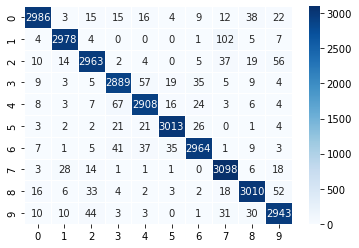

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
# label 0 = negative, 1 = neutral, 2 = positive
cf_matrix = confusion_matrix(y_test, predicted_knn)
af=sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', cmap ='Blues')
af.figure.savefig('conf_matrix_knn.png', dpi=400)

In [65]:
lgr.intercept_

array([-1.0756763 , -2.79051387, -2.88574351, -0.83549266, -0.90438592,
       -2.24960851, -1.51966468, -1.94312997, -1.58139963, -1.62374234])

In [66]:
lgr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
lgr.coef_

array([[    0.        ,  -422.32853871,  -285.19800532, ...,
         -128.48776019,  -248.4134215 , -4438.42179465],
       [ 1335.5585094 ,   317.7175059 ,   444.9901478 , ...,
          234.82493325,    57.85951488,     0.        ],
       [    0.        ,  1828.32641882,    17.45831412, ...,
          510.04229062,   341.81610125,  2110.        ],
       ...,
       [ -846.96911095,   817.43336529,   120.79871083, ...,
         -354.02179933,  -340.38658012,     0.        ],
       [-1750.        ,  1720.        , -1171.7002064 , ...,
         -352.98447165,  -162.82773469,  1790.        ],
       [    0.        ,  1503.22363039,  -389.76542232, ...,
         -112.32655297,  -143.87341064, -1640.        ]])

In [68]:
# import numpy as np
# from sklearn.metrics import mean_absolute_error
#
# k_value_errors = []
#
# # calculating error values for k from 1 to 10
# for k in range(1, 20):
#
#     # create KNN classifier
#     knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=1, weights='distance')
#
#     # train the model using the training sets
#     knn.fit(X_train, y_train)
#
#     # predicting the target value for the test dataset
#     pred = knn.predict(X_test)
#
#     #  calculating and adding the error to the 'k_value_errors' list
#     k_value_errors.append(accuracy_score(y_test, pred))
#
# # Displaying Mean error as a function of K value
# plt.title('Error Rate for K Value')
# plt.plot(range(1, 20), k_value_errors, color='black', marker='x')
#
# plt.xlabel('K Value')
# plt.ylabel('accuracy')
# plt.savefig('error_rate_knn.png')